# Undelayed

C:\Users\C\AppData\Local\Temp\ipykernel_14244\61221509.py:19: RuntimeWarning: overflow encountered in double_scalars
  dx_dt = (x_t - (x_t**3)/3 - y_t + c*(x_delayed - x_t)) / epsilon
E:\anaconda\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: vode: Repeated convergence failures. (Perhaps bad Jacobian supplied or wrong choice of MF or tolerances.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
E:\anaconda\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
E:\anaconda\lib\site-packages\scipy\integrate\_ode.py:1013: UserWarning: vode: Illegal input detected. (See printed message.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


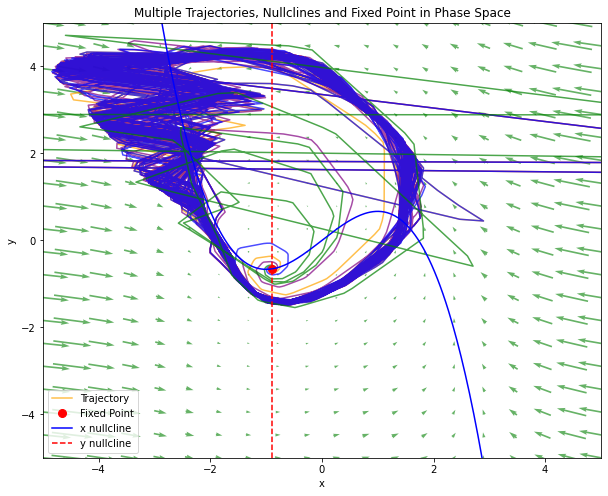

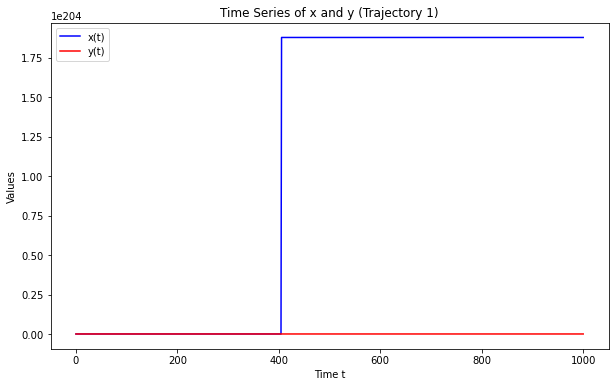

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


epsilon = 1  
c = 1        
tau = 0      
a = 0.9      



def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]

    dx_dt = (x_t - (x_t**3)/3 - y_t + c*(x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])

x_eq = -a
y_eq = x_eq - (x_eq**3) / 3


perturbations = [(-0.05, -0.05), (0.05, -0.05), (-0.05, 0.05), (0.05, 0.05), (0, 0)]
initial_conditions = [np.array([x_eq + dp[0], y_eq + dp[1]]) for dp in perturbations]

T_final = 1000
t = np.linspace(0, T_final, 10000)


trajectories = []
for ic in initial_conditions:

    history = lambda t, ic=ic: ic
    sol = ddeint(model, history, t)
    trajectories.append(sol)


plt.figure(figsize=(10, 8))


colors = ['orange', 'purple', 'blue', 'green', 'magenta']
for sol, col in zip(trajectories, colors):
    plt.plot(sol[:, 0], sol[:, 1], color=col, alpha=0.7, label='Trajectory' if col==colors[0] else None)


plt.plot(x_eq, y_eq, 'ro', markersize=8, label='Fixed Point')

x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon 
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')


x_line = np.linspace(-5, 5, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')

plt.axvline(x=-a, color='r', linestyle='--', label='y nullcline')

plt.xlim(-5, 5)
# plt.xlim(-2, 2)
# plt.ylim(-2, 2)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multiple Trajectories, Nullclines and Fixed Point in Phase Space')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, trajectories[0][:, 0], label='x(t)', color='blue')
plt.plot(t, trajectories[0][:, 1], label='y(t)', color='red')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.title('Time Series of x and y (Trajectory 1)')
plt.legend()
plt.show()


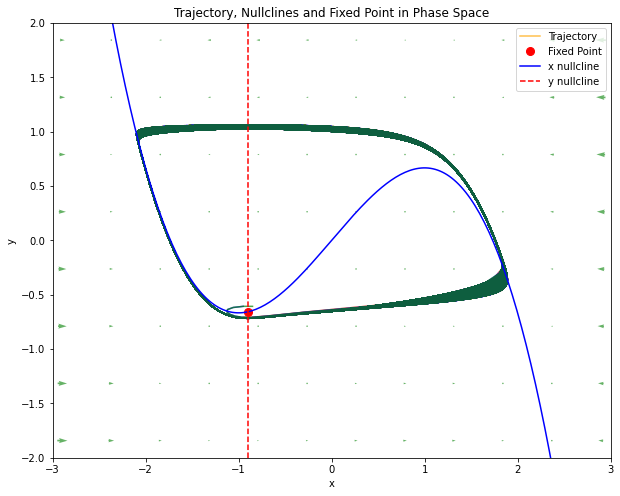

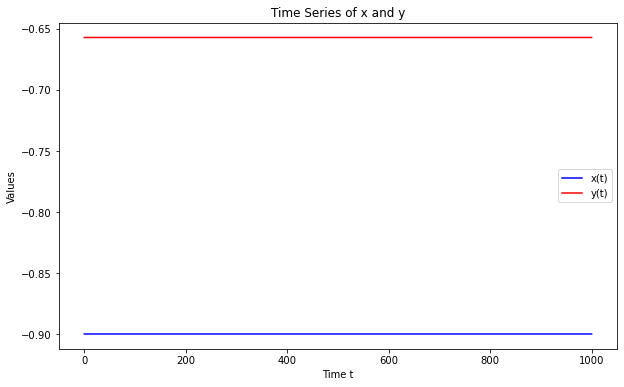

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


epsilon = 0.05 
c = 1       
a = 0.9      


def model(Y, t):
    x, y = Y
    dx_dt = (x - (x**3)/3 - y) / epsilon 
    dy_dt = x + a
    return np.array([dx_dt, dy_dt])


x_eq = -a
y_eq = x_eq - (x_eq**3) / 3



# ic = np.array([x_eq - 0.05, y_eq - 0.05])


perturbations = [(-0.05, -0.05), (0.05, -0.05), (-0.05, 0.05), (0.05, 0.05), (0, 0)]
initial_conditions = [np.array([x_eq + dp[0], y_eq + dp[1]]) for dp in perturbations]


T_final = 1000
t = np.linspace(0, T_final, 10000)



trajectories = []
for ic in initial_conditions:

    history = lambda t, ic=ic: ic
    sol = odeint(model, ic, t)
    trajectories.append(sol)

plt.figure(figsize=(10, 8))


colors = ['orange', 'purple', 'blue', 'green', 'magenta']
for sol, col in zip(trajectories, colors):
    plt.plot(sol[:, 0], sol[:, 1], color=col, alpha=0.7, label='Trajectory' if col==colors[0] else None)
    

plt.plot(x_eq, y_eq, 'ro', markersize=8, label='Fixed Point')


x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')


x_line = np.linspace(-5, 5, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')
plt.axvline(x=-a, color='r', linestyle='--', label='y nullcline')

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory, Nullclines and Fixed Point in Phase Space')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, sol[:, 0], label='x(t)', color='blue')
plt.plot(t, sol[:, 1], label='y(t)', color='red')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.title('Time Series of x and y')
plt.legend()
plt.show()


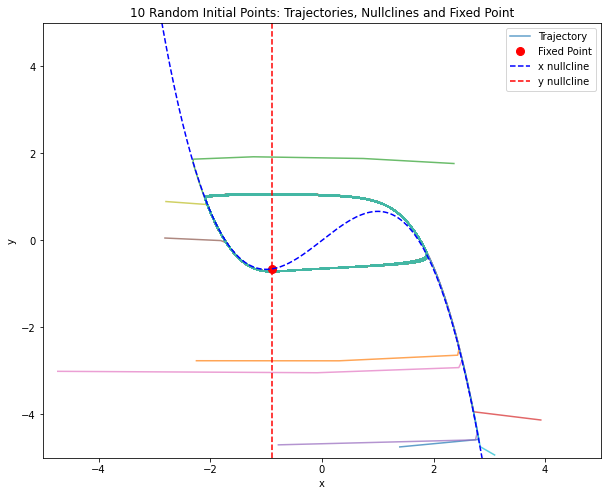

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import random


epsilon = 0.05  
c = 1         
a = 0.9        
num_trajectories = 10  


def model(Y, t):
    x, y = Y
    dx_dt = (x - (x**3)/3 - y) / epsilon
    dy_dt = x + a
    return np.array([dx_dt, dy_dt])


x_eq = -a
y_eq = x_eq - (x_eq**3) / 3


random.seed(42) 
initial_conditions = []
for _ in range(num_trajectories):
    x0 = random.uniform(-5, 5)
    y0 = random.uniform(-5, 5)
    initial_conditions.append(np.array([x0, y0]))


T_final = 1000
t = np.linspace(0, T_final, 20000) 

trajectories = []
for ic in initial_conditions:
    sol = odeint(model, ic, t)
    trajectories.append(sol)

plt.figure(figsize=(10, 8))


for i, sol in enumerate(trajectories):
    plt.plot(sol[:, 0], sol[:, 1], alpha=0.7, label='Trajectory' if i == 0 else None)

plt.plot(x_eq, y_eq, 'ro', markersize=8, label='Fixed Point')


# x_vals = np.linspace(-5, 5, 20)
# y_vals = np.linspace(-5, 5, 20)
# X, Y = np.meshgrid(x_vals, y_vals)
# dx = (X - (X**3) / 3 - Y) / epsilon
# dy = X + a
# plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')

x_line = np.linspace(-5, 5, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', linestyle='--', label='x nullcline')
plt.axvline(x=-a, color='r', linestyle='--', label='y nullcline')


plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('10 Random Initial Points: Trajectories, Nullclines and Fixed Point')
plt.legend()
plt.show()


### 收敛 a>1

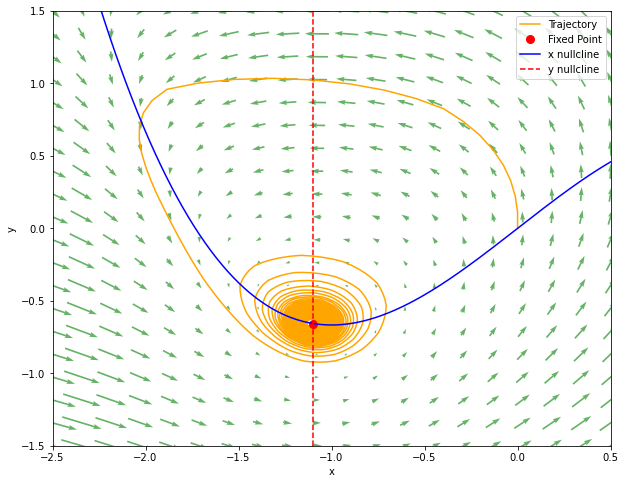

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

epsilon = 0.8  
c = 0.5          
tau = 0        
a = 1.1     


def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]

    dx_dt = (x_t - (x_t**3)/3 - y_t + c*(x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])


x_eq = -a
y_eq = x_eq - (x_eq**3) / 3


# ic = np.array([x_eq - 0.05, y_eq - 0.05]) 


ic = np.array([0, 0])  


history = lambda t: ic


T_final = 1000
t = np.linspace(0, T_final, 10000)


sol = ddeint(model, history, t)

plt.figure(figsize=(10, 8))


plt.plot(sol[:, 0], sol[:, 1], color='orange', label='Trajectory')


plt.plot(x_eq, y_eq, 'ro', markersize=8, label='Fixed Point')


x_vals = np.linspace(-2.5, 0.5, 20)
y_vals = np.linspace(-1.5, 1.5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')



x_line = np.linspace(-2.5, 0.5, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')

plt.axvline(x=-a, color='r', linestyle='--', label='y nullcline')

plt.xlim(-2.5, 0.5)
plt.ylim(-1.5, 1.5)
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(t, sol[:, 0], label='x(t)', color='blue')
# plt.plot(t, sol[:, 1], label='y(t)', color='red')
# plt.xlabel('Time t')
# plt.ylabel('Values')
# plt.title('Time Series of x and y')
# plt.legend()
# plt.show()


### 不收敛 a <1

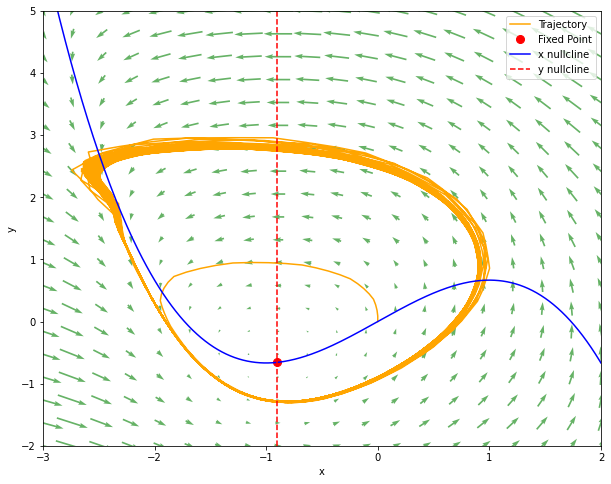

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


epsilon = 1   
c = 2        
tau = 0      
a = 0.9     



def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]

    dx_dt = (x_t - (x_t**3)/3 - y_t + c*(x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])


x_eq = -a
y_eq = x_eq - (x_eq**3) / 3


# ic = np.array([x_eq - 0.05, y_eq - 0.05])  

ic = np.array([0, 0])  


history = lambda t: ic


T_final = 1000
t = np.linspace(0, T_final, 10000)


sol = ddeint(model, history, t)


plt.figure(figsize=(10, 8))


plt.plot(sol[:, 0], sol[:, 1], color='orange', label='Trajectory')


plt.plot(x_eq, y_eq, 'ro', markersize=8, label='Fixed Point')


x_vals = np.linspace(-3, 2, 20)
y_vals = np.linspace(-2, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')


x_line = np.linspace(-3, 2, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')

plt.axvline(x=-a, color='r', linestyle='--', label='y nullcline')

plt.xlim(-3, 2)
plt.ylim(-2, 5)
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(t, sol[:, 0], label='x(t)', color='blue')
# plt.plot(t, sol[:, 1], label='y(t)', color='red')
# plt.xlabel('Time t')
# plt.ylabel('Values')
# plt.title('Time Series of x and y')
# plt.legend()
# plt.show()


### Hopf 分叉

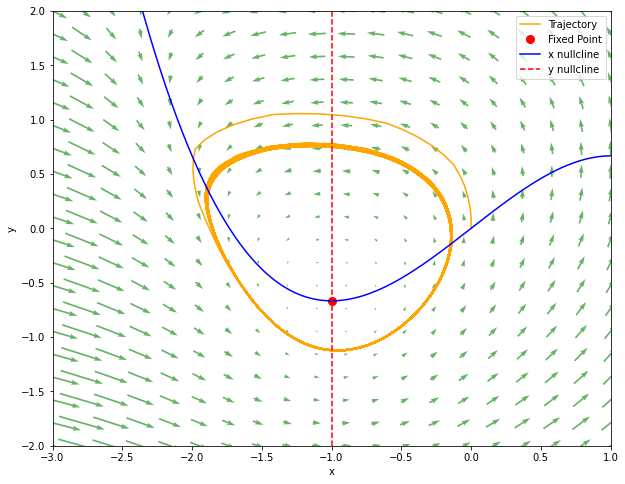

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


epsilon = 1  
c = 2           
tau = 0          
a = 1     


def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]

    dx_dt = (x_t - (x_t**3)/3 - y_t + c*(x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])


x_eq = -a
y_eq = x_eq - (x_eq**3) / 3


# ic = np.array([x_eq - 0.05, y_eq - 0.05]) 


ic = np.array([0, 0])  


history = lambda t: ic


T_final = 1000
t = np.linspace(0, T_final, 10000)


sol = ddeint(model, history, t)


plt.figure(figsize=(10, 8))


plt.plot(sol[:, 0], sol[:, 1], color='orange', label='Trajectory')

plt.plot(x_eq, y_eq, 'ro', markersize=8, label='Fixed Point')


x_vals = np.linspace(-3, 1, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')

x_line = np.linspace(-3, 1, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')

plt.axvline(x=-a, color='r', linestyle='--', label='y nullcline')

plt.xlim(-3, 1)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


# plt.figure(figsize=(10, 6))
# plt.plot(t, sol[:, 0], label='x(t)', color='blue')
# plt.plot(t, sol[:, 1], label='y(t)', color='red')
# plt.xlabel('Time t')
# plt.ylabel('Values')
# plt.title('Time Series of x and y')
# plt.legend()
# plt.show()


# Delayed

收敛

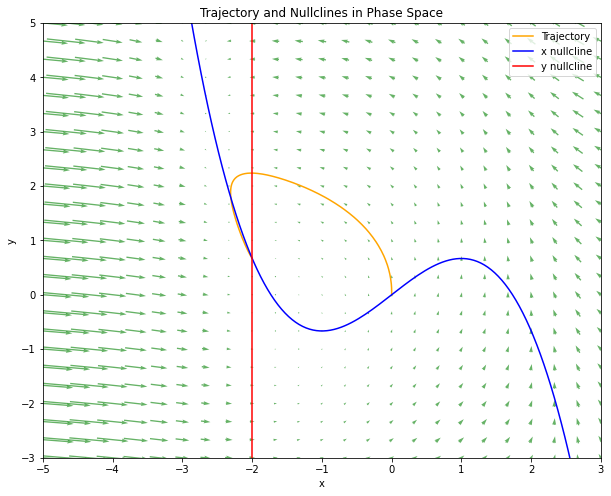

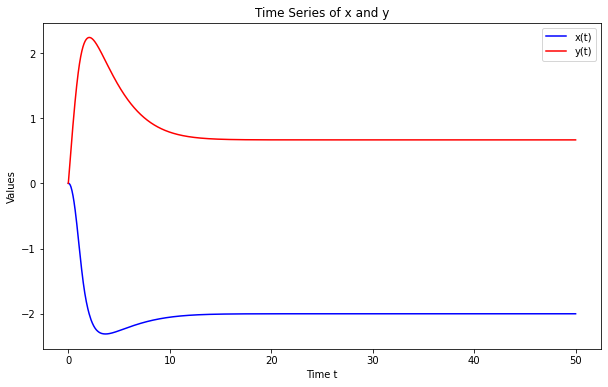

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


epsilon = 1 
c = 1       
tau = 1    
a = 2     
# def history(t):
#     x_eq = - a 
#     y_eq = x_eq - (x_eq**3)/3
#     perturb = 1e-5 
#     return np.array([x_eq + perturb, y_eq + perturb])


def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]

    dx_dt = (x_t - (x_t**3) / 3 - y_t + c * (x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])


def history(t):
    return np.array([0,0])


T_final = 50
t = np.linspace(0, T_final, 4000)

sol = ddeint(model, history, t)

x_t = sol[:, 0]
y_t = sol[:, 1]


plt.figure(figsize=(10, 8))
plt.plot(x_t, y_t, label='Trajectory', color='orange')


x_vals = np.linspace(-5, 3, 25)
y_vals = np.linspace(-3, 5, 25)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon  
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')


x_line = np.linspace(-10, 10, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')


plt.axvline(x=-a, color='r', label='y nullcline')

plt.xlim(-5, 3)
plt.ylim(-3, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory and Nullclines in Phase Space')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t)', color='blue')
plt.plot(t, y_t, label='y(t)', color='red')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.title('Time Series of x and y')
plt.legend()
plt.show()


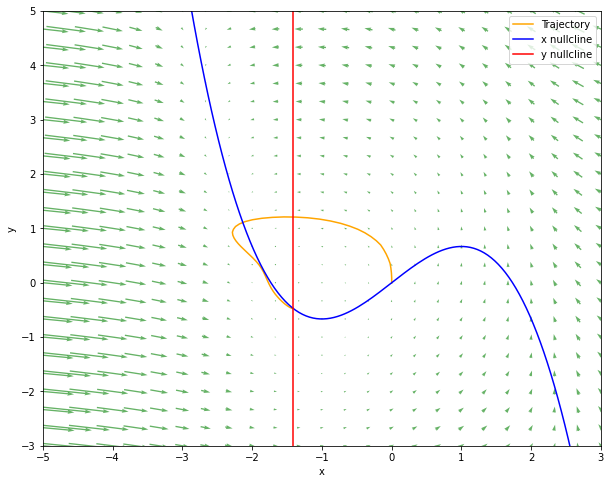

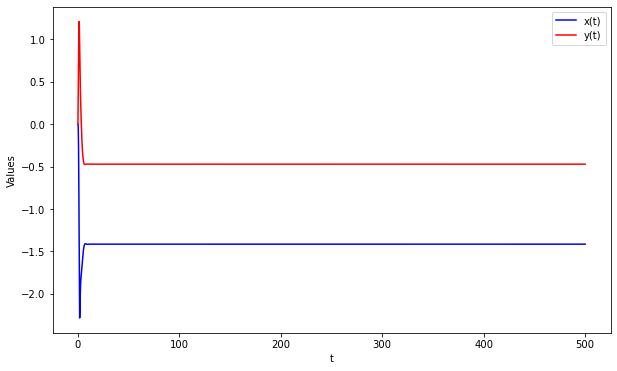

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


epsilon = 1  
c = -1        
tau = 0.5   
a = np.sqrt(2)     

# def history(t):
#     x_eq = - a  
#     y_eq = x_eq - (x_eq**3)/3
#     perturb = 1e-5  
#     return np.array([x_eq + perturb, y_eq + perturb])


def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]
    


    dx_dt = (x_t - (x_t**3) / 3 - y_t + c * (x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])


def history(t):
    return np.array([0,0])


T_final = 500
t = np.linspace(0, T_final, 8000)


sol = ddeint(model, history, t)

x_t = sol[:, 0]
y_t = sol[:, 1]

plt.figure(figsize=(10, 8))
plt.plot(x_t, y_t, label='Trajectory', color='orange')

x_vals = np.linspace(-5, 3, 25)
y_vals = np.linspace(-3, 5, 25)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon 
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')


x_line = np.linspace(-10, 10, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')

plt.axvline(x=-a, color='r', label='y nullcline')

plt.xlim(-5, 3)
plt.ylim(-3, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t)', color='blue')
plt.plot(t, y_t, label='y(t)', color='red')
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()
plt.show()


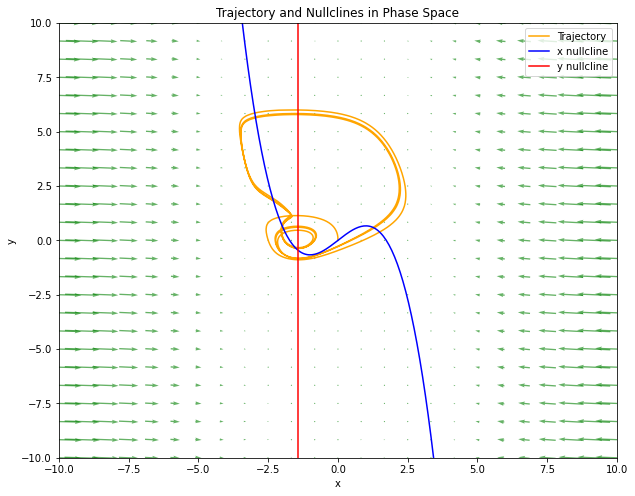

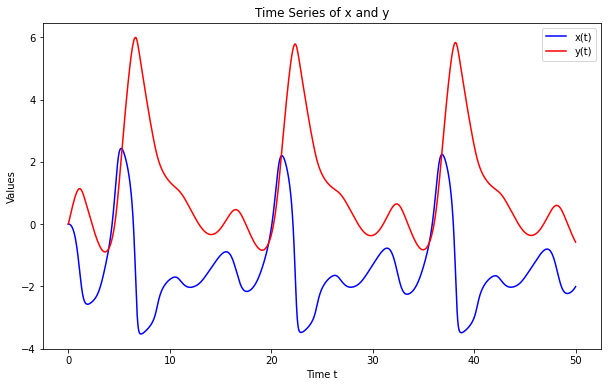

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint

epsilon = 1  
c = -1        
tau = 2    
a = np.sqrt(2)      

# def history(t):
#     x_eq = - a  
#     y_eq = x_eq - (x_eq**3)/3
#     perturb = 1e-5 
#     return np.array([x_eq + perturb, y_eq + perturb])

def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]
    

    dx_dt = (x_t - (x_t**3) / 3 - y_t + c * (x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])

def history(t):
    return np.array([0,0])


T_final = 50
t = np.linspace(0, T_final, 4000)

sol = ddeint(model, history, t)

x_t = sol[:, 0]
y_t = sol[:, 1]

plt.figure(figsize=(10, 8))
plt.plot(x_t, y_t, label='Trajectory', color='orange')

x_vals = np.linspace(-10, 10, 25)
y_vals = np.linspace(-10, 10, 25)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')

x_line = np.linspace(-10, 10, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')

plt.axvline(x=-a, color='r', label='y nullcline')

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectory and Nullclines in Phase Space')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t)', color='blue')
plt.plot(t, y_t, label='y(t)', color='red')
plt.xlabel('Time t')
plt.ylabel('Values')
plt.title('Time Series of x and y')
plt.legend()
plt.show()


上面那张图，应该是limit cycle


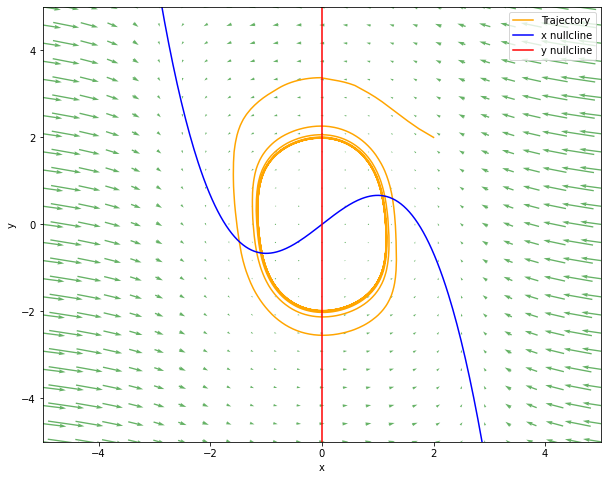

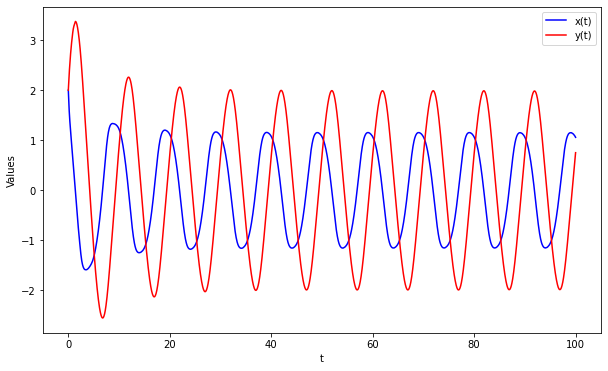

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint


epsilon = 1 
c = 1        
tau = 2   
a = 0    

# def history(t):
#     x_eq = - a 
#     y_eq = x_eq - (x_eq**3)/3
#     perturb = 1e-5  
#     return np.array([x_eq + perturb, y_eq + perturb])


def model(Y, t):

    x_delayed = Y(t - tau)[0]
    x_t = Y(t)[0]
    y_t = Y(t)[1]

    dx_dt = (x_t - (x_t**3) / 3 - y_t + c * (x_delayed - x_t)) / epsilon
    dy_dt = x_t + a
    return np.array([dx_dt, dy_dt])


def history(t):
    return np.array([2,2])


T_final = 100
t = np.linspace(0, T_final, 4000)


sol = ddeint(model, history, t)

x_t = sol[:, 0]
y_t = sol[:, 1]


plt.figure(figsize=(10, 8))
plt.plot(x_t, y_t, label='Trajectory', color='orange')

x_vals = np.linspace(-5, 5, 25)
y_vals = np.linspace(-5, 5, 25)
X, Y = np.meshgrid(x_vals, y_vals)
dx = (X - (X**3) / 3 - Y) / epsilon  
dy = X + a
plt.quiver(X, Y, dx, dy, color='g', alpha=0.6, pivot='middle')


x_line = np.linspace(-5, 5, 400)
y_xnull = x_line - (x_line**3) / 3
plt.plot(x_line, y_xnull, 'b', label='x nullcline')


plt.axvline(x=-a, color='r', label='y nullcline')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label='x(t)', color='blue')
plt.plot(t, y_t, label='y(t)', color='red')
plt.xlabel('t')
plt.ylabel('Values')
plt.legend()
plt.show()
